# División de los jugadores en clusters. 🤔⚽

❗ Mediante el clustering es posible dividir a los jugadores en grupos según sus características.

🧐 De este modo, será más realista el modelo predictivo diseñado, pues no se puede analizar de la misma manera un atacante, un defensa o un portero.

In [11]:
import numpy as np
import pandas as pd

import pickle


import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler


from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


from ds_utils.unsupervised import plot_cluster_cardinality, plot_cluster_magnitude, plot_magnitude_vs_cardinality
from scipy.spatial.distance import euclidean


import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv("../../data/precio/dfproc.csv", index_col = 0)
df.head()

,edad,Valoración_actual,Progresión,precio,Ataque,Regate,Aceleración,Potencia_tiro,Agresividad,Defensa,Portería
0,21,70,80,3300000,54,47,62,35,65,67,10
11,21,70,80,3300000,31,44,64,45,75,74,14
12,18,70,81,3100000,31,54,65,60,71,68,15
14,18,70,81,3100000,43,59,62,49,66,69,10
15,19,70,81,3300000,61,74,84,41,69,63,8


In [13]:
df2 = df.drop(['precio'], axis=1)

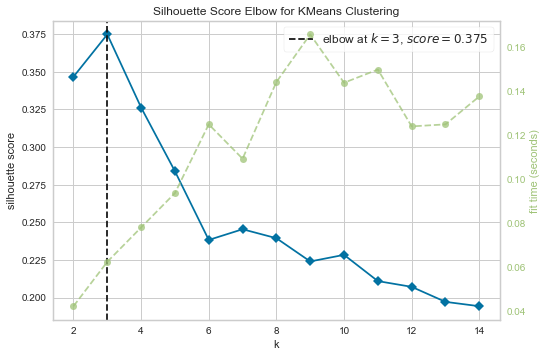

In [14]:
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,15), metric='silhouette')

visualizer.fit(df2)  

visualizer.show();

In [15]:
kmeans = KMeans(n_clusters=3)

km_fit = kmeans.fit(df2)

labels = km_fit.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2,
       2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0,
       2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0,
       0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 1, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0,
       0, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0,
       0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0])

In [16]:
def save_model(amount, filename = "cluster.pkl"): 
    with open(filename, "wb") as f:
        pickle.dump(amount, f)

In [17]:
save_model(km_fit)

In [18]:
centroides = km_fit.cluster_centers_
centroides

array([[18.74100719, 66.73381295, 81.30215827, 53.25899281, 62.04316547,
        70.58992806, 55.3381295 , 63.99280576, 60.58273381,  9.98561151],
       [19.        , 66.16666667, 81.16666667, 15.33333333, 15.83333333,
        46.66666667, 47.66666667, 28.        , 12.16666667, 67.        ],
       [18.39716312, 65.73049645, 81.62411348, 54.5035461 , 68.87943262,
        76.4751773 , 64.19148936, 46.88652482, 29.26241135,  9.78014184]])

In [19]:
df["Cluster"] = labels
df

,edad,Valoración_actual,Progresión,precio,Ataque,Regate,Aceleración,Potencia_tiro,Agresividad,Defensa,Portería,Cluster
0,21,70,80,3300000,54,47,62,35,65,67,10,0
11,21,70,80,3300000,31,44,64,45,75,74,14,0
12,18,70,81,3100000,31,54,65,60,71,68,15,0
14,18,70,81,3100000,43,59,62,49,66,69,10,0
15,19,70,81,3300000,61,74,84,41,69,63,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
362,17,62,84,1200000,52,64,70,58,62,33,7,2
364,17,62,85,1200000,56,73,74,48,71,31,7,2
368,16,62,85,1200000,58,64,71,60,56,55,7,0
371,16,62,85,1200000,49,69,69,58,45,45,6,2


In [10]:
df.to_csv('../../data/precio/dfclust.csv')